Load Necessary Libraries

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [3]:
# Generating linear features
np.random.seed(42)
n_samples = 1000

# Linear features
X_linear = np.random.uniform(low=-5, high=5, size=(n_samples, 3))  # Creating 3 linear features

# Nonlinear features
X_nonlinear = np.random.randn(n_samples, 3)  # Creating 3 nonlinear features

# (combining linear and nonlinear relationships)
y_linear = 2 * X_linear[:, 0] + 0.5 * X_linear[:, 1] - X_linear[:, 2] + np.random.randn(n_samples) * 0.5  # Linear relationship
y_nonlinear = X_nonlinear[:, 0]**2 + np.sin(X_nonlinear[:, 1]) + np.exp(X_nonlinear[:, 2]) + np.random.randn(n_samples) * 0.5  # Nonlinear relationship

y = np.concatenate((y_linear, y_nonlinear))
y = (y > np.median(y)).astype(int)  

# Combining linear and nonlinear features
X = np.vstack((X_linear, X_nonlinear))

print("Shapes of data and labels:", X.shape, y.shape)


Shapes of data and labels: (2000, 3) (2000,)


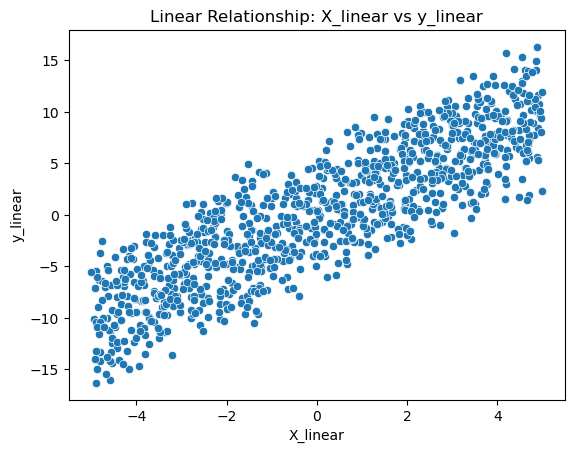

In [4]:

# Creating a DataFrame from the arrays
data = pd.DataFrame({'X_linear': X_linear[:, 0], 'y_linear': y_linear})

# Plotting using Seaborn
sns.scatterplot(x='X_linear', y='y_linear', data=data)
plt.title('Linear Relationship: X_linear vs y_linear')
plt.xlabel('X_linear')
plt.ylabel('y_linear')
plt.show()


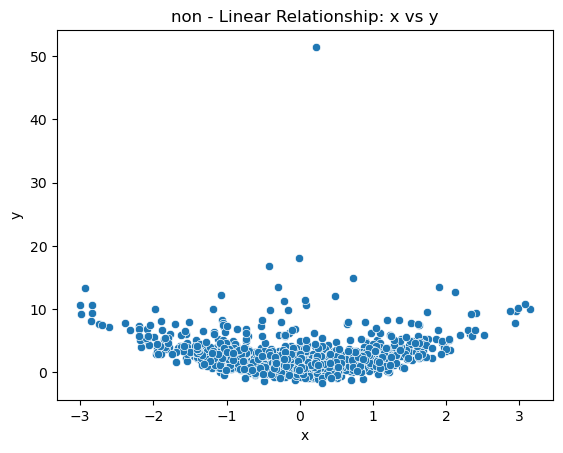

In [5]:

# Creating a DataFrame from the arrays
data = pd.DataFrame({'X_nonlinear': X_nonlinear[:, 0], 'y_nonlinear': y_nonlinear})

# Plotting using Seaborn
sns.scatterplot(x='X_nonlinear', y='y_nonlinear', data=data)
plt.title('non - Linear Relationship: x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [6]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000]))

In [7]:
unique_elements, counts = np.unique(y, return_counts=True)
for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Count: {count}")

Element: 0, Count: 1000
Element: 1, Count: 1000


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:


dt = DecisionTreeClassifier(max_depth=4, random_state=0)
rf = RandomForestClassifier(n_estimators=20, random_state=0)
knn = KNeighborsClassifier(n_neighbors=4)
lr = LogisticRegression(random_state=0,penalty = 'l1', solver= 'saga')

estimators = [
    ('knn', knn), \
    ('lr', lr), \
    ('dt', dt)
]
stacker = AdaBoostClassifier()   
model = StackingClassifier(
    estimators=estimators, final_estimator= stacker
)

<h4/>Incase of single model prediction KPI</h4>

In [10]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5,error_score='raise')

# Training the model on the entire training set
knn.fit(X_train, y_train)

# Evaluating the model on the test set
test_accuracy = knn.score(X_test, y_test)

# Displaying cross-validation scores and test accuracy
print("Cross-validation scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Cross-validation scores: [0.871875 0.890625 0.85625  0.871875 0.85625 ]
Mean CV Accuracy: 0.8694
Test Accuracy: 0.8825


<h4/>Incase of stacked model prediction KPI</h4>

In [11]:

cv_scores = cross_val_score(model, X_train, y_train, cv=5,error_score='raise')

# Training the model on the entire training set
model.fit(X_train, y_train)

# Evaluating the model on the test set
test_accuracy = model.score(X_test, y_test)

# Displaying cross-validation scores and test accuracy
print("Cross-validation scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Cross-validation scores: [0.871875 0.890625 0.85625  0.871875 0.85625 ]
Mean CV Accuracy: 0.8694
Test Accuracy: 0.9050


<h5/>As per above test accuracy  we can conclude there is 0.02% improvement in test accuracy in case of stacked ensemble algorithm as compared to single model</h5>